In [18]:
import neuralnetwork as nn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('../ML/Sentdex Playlist/Datasets/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

df = df.astype(float)

X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

In [20]:
X.shape

(699, 9)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
y_train: pd.DataFrame = y_train.astype(np.uint8)
y_train[y_train==2] = 0
y_train[y_train==4] = 1

y_test: pd.DataFrame = y_test.astype(np.uint8)
y_test[y_test==2] = 0
y_test[y_test==4] = 1

In [23]:
model = nn.models.Sequential([
                    nn.layers.Layer_Dense(9, 128, activation=nn.activations.ReLU),
                    nn.layers.Layer_Dense(128, 128, activation=nn.activations.ReLU),
                    nn.layers.Layer_Dense(128, 128, activation=nn.activations.ReLU),
                    nn.layers.Layer_Dense(128, 2, activation=nn.activations.Softmax),
                ])

In [24]:
history = model.fit(X_train, y_train.astype(np.uint8), epoch=8, print_output=False)

Epoch 1 :
loss:  0.15511968600228757
Epoch 2 :
loss:  0.15511968600228757
Epoch 3 :
loss:  0.15511968600228757
Epoch 4 :
loss:  0.15511968600228757
Epoch 5 :
loss:  0.1455094624960009
Epoch 6 :
loss:  0.12735156877658607
Epoch 7 :
loss:  0.12084910795320708
Epoch 8 :
loss:  0.12084910795320708


In [25]:
model.save("MyModel2")

True

In [26]:
model = nn.models.load_model(path_to_model="MyModel2")

In [27]:
print(history)

[0.15511968600228757, 0.15511968600228757, 0.15511968600228757, 0.15511968600228757, 0.1455094624960009, 0.12735156877658607, 0.12084910795320708, 0.12084910795320708]


In [28]:
predictions = model.predict(X_test)

In [29]:
np.argmax(predictions[1])

0

In [30]:
np.mean([np.argmax(prediction[0]) for prediction in predictions]==y_test)

0.9428571428571428

In [31]:
predictions2 = model.predict([[4, 2, 1, 1, 1, 2, 3, 2, 1], [4, 2, 1, 2, 2, 2, 3, 2, 1]])

In [32]:
[np.argmax(prediction[0]) for prediction in predictions2]

[0, 0]

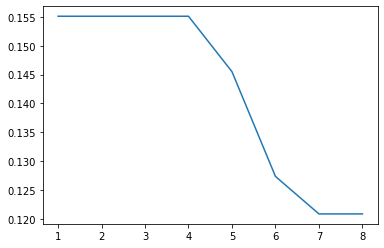

In [36]:
plt.plot(range(1, len(history)+1), history)